###Mini-Project 3
###Tanvir Alam
###January 20, 2021

*Import Libraries*











The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes.

In [836]:
#Standard Libraries for visualization and data wrangling 

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

#Logistic Regression Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# Layout the data

In [837]:
data_hospital = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')

In [838]:
data_hospital.columns = data_hospital.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')

In [839]:
diabetes = data_hospital

checking the head value of dataset_diabetes

In [840]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [841]:
diabetes.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

**using info and describe() on diabetes dataset**

In [842]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [843]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# EDA

explore the data using seaborn!
try to recreate the data in four different diagrams

*First drop unnecessary columns*

In [844]:
diabetes.dropna(inplace=True)

In [845]:
gender = pd.get_dummies(diabetes['gender'],drop_first=True)
readmitted = pd.get_dummies(diabetes['readmitted'],drop_first=True)
race = pd.get_dummies(diabetes['race'],drop_first=True)

In [846]:
diabetes.drop(['age',	'weight', 'num_lab_procedures',	'number_outpatient', 'admission_type_id', 'admission_source_id',	'payer_code',	'medical_specialty', 'number_emergency', 'diag_1',	'diag_2',	'diag_3',	'max_glu_serum','a1cresult','metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',	'troglitazone',	'tolazamide',	'examide', 'citoglipton', 'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',	'metformin-rosiglitazone','metformin-pioglitazone',	'diabetesmed', 'change'],axis=1,inplace=True)

In [847]:
diabetes = pd.concat([diabetes,gender,race,readmitted],axis=1)

In [848]:
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,num_procedures,num_medications,number_inpatient,number_diagnoses,readmitted,Male,Unknown/Invalid,AfricanAmerican,Asian,Caucasian,Hispanic,Other,>30,NO
0,2278392,8222157,Caucasian,Female,25,1,0,1,0,1,NO,0,0,0,0,1,0,0,0,1
1,149190,55629189,Caucasian,Female,1,3,0,18,0,9,>30,0,0,0,0,1,0,0,1,0
2,64410,86047875,AfricanAmerican,Female,1,2,5,13,1,6,NO,0,0,1,0,0,0,0,0,1
3,500364,82442376,Caucasian,Male,1,2,1,16,0,7,NO,1,0,0,0,1,0,0,0,1
4,16680,42519267,Caucasian,Male,1,1,0,8,0,5,NO,1,0,0,0,1,0,0,0,1
5,35754,82637451,Caucasian,Male,1,3,6,16,0,9,>30,1,0,0,0,1,0,0,1,0
6,55842,84259809,Caucasian,Male,1,4,1,21,0,7,NO,1,0,0,0,1,0,0,0,1
7,63768,114882984,Caucasian,Male,1,5,0,12,0,8,>30,1,0,0,0,1,0,0,1,0
8,12522,48330783,Caucasian,Female,1,13,2,28,0,8,NO,0,0,0,0,1,0,0,0,1
9,15738,63555939,Caucasian,Female,3,12,3,18,0,8,NO,0,0,0,0,1,0,0,0,1


*now begin with histogram for the time_in_hospital and discharge_disposition_id*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


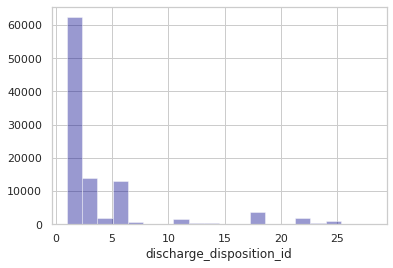

In [849]:
sns.set_style("whitegrid") 
sns.distplot(diabetes['discharge_disposition_id'].dropna(), kde=False, color='darkblue',bins=20)

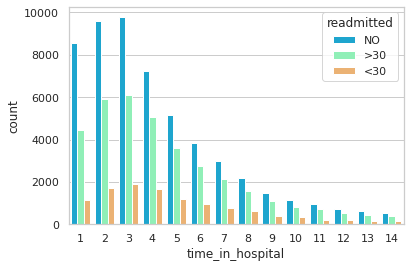

In [850]:
sns.set_style('whitegrid')
sns.countplot(x='time_in_hospital', hue='readmitted', data=diabetes, palette='rainbow')

*add a scatter plot between the number of medications and race*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


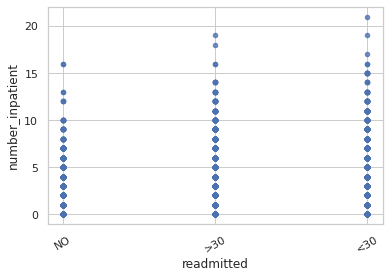

In [851]:
diabetes.plot(kind="scatter", x="readmitted", y="number_inpatient", alpha=.8, rot=30)

*using pie chart to distinguish between race and the num_medications*

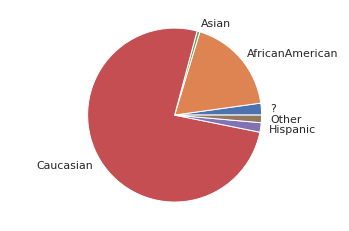

In [852]:
sums = diabetes.groupby(diabetes["race"])["num_medications"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

# Logistic Regression


Now it's time to do a train test split, and diabetes model.

** Split the data into training set and testing set using train_test_split**

In [853]:
ds = diabetes

In [854]:
y = ds['readmitted']
X = ds[['time_in_hospital', 'num_medications', 'Caucasian', 'Asian', 'Hispanic', 'AfricanAmerican', 'number_inpatient', 'discharge_disposition_id']]

In [855]:
X_diabetes, X_test, y_diabetes, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [856]:
sc = StandardScaler()
X_diabetes = sc.fit_transform(X_diabetes)
X_test = sc.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [857]:
logmodel = LogisticRegression()

In [858]:
logmodel.fit(X_diabetes, y_diabetes)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction and Evaluations

In [859]:
y_pred = logmodel.predict(X_test)

In [860]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.44      0.01      0.02      2849
         >30       0.50      0.19      0.27      8884
          NO       0.58      0.93      0.71     13709

    accuracy                           0.57     25442
   macro avg       0.51      0.38      0.34     25442
weighted avg       0.54      0.57      0.48     25442



[[   36   692  2121]
 [   36  1677  7171]
 [   10   964 12735]]


prediction explained:

- data shows the accuracy of python predicting the number of readmitted is 57%, which means this data classifer is not always accurate

- So, a patient being readmitted <30, precision label 44%, however the classifer predicts a 1%  true positive rate counts 

- For >30 python predicted 50% if selected male patient were readmitted, but the recalls announce 19% patient has been readmitted as the the true positive rate 

- When there was no readmitted for patients python predicted 58% and classifers percentage is 93% correct that 58% patient based on race would not get readmitted is the most accurate

This data is combined with data of time in hospital', number of medications,  number of inpatient, and discharge_disposition_id for the outcome

What I wish is to find a easier way to provide infomation based on race and readmitted alone and provide a better prediction for the diabetes data